# Exploratory Data Analysis

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
train =pd.read_csv("tested.csv")

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# finding the missing data

In [67]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

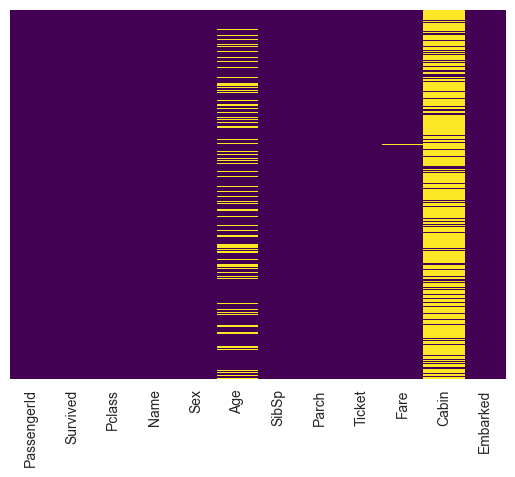

In [68]:
sns.heatmap(train.isnull() ,yticklabels=False,cbar=False,cmap='viridis')

# handeling the missing data or nan values

<Axes: xlabel='Survived', ylabel='count'>

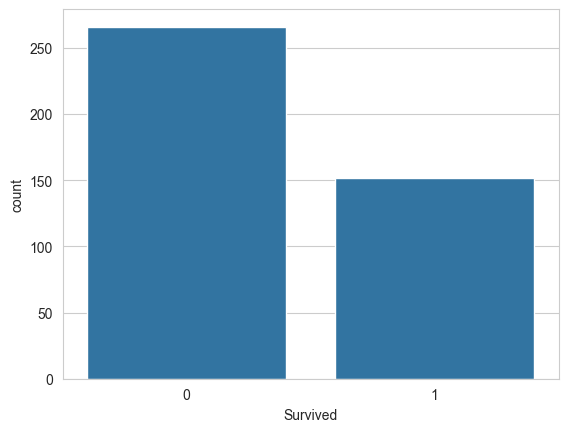

In [69]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train)

<Axes: xlabel='Survived', ylabel='count'>

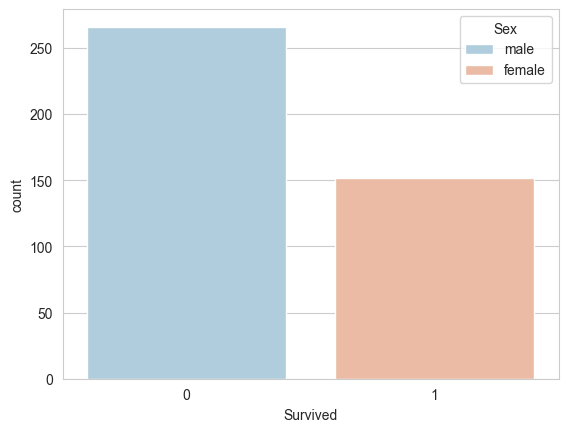

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' ,hue='Sex' ,data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

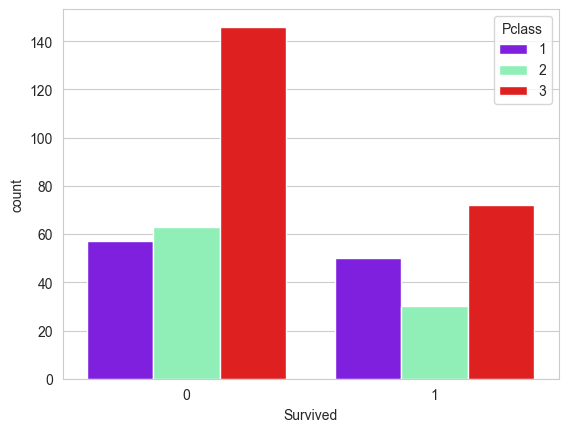

In [71]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train,palette='rainbow')

C:\Users\dell\AppData\Local\Temp\ipykernel_4716\214273912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred', bins=40)


<Axes: xlabel='Age'>

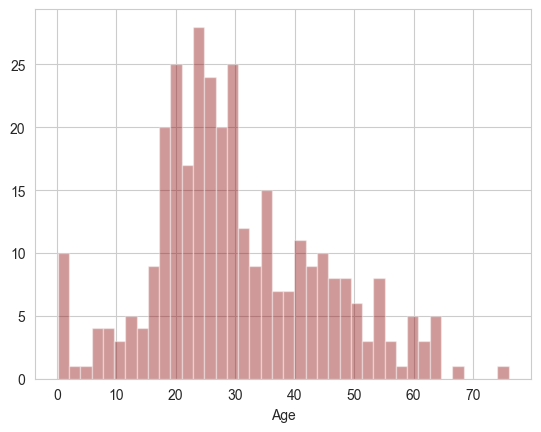

In [72]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred', bins=40)

<Axes: >

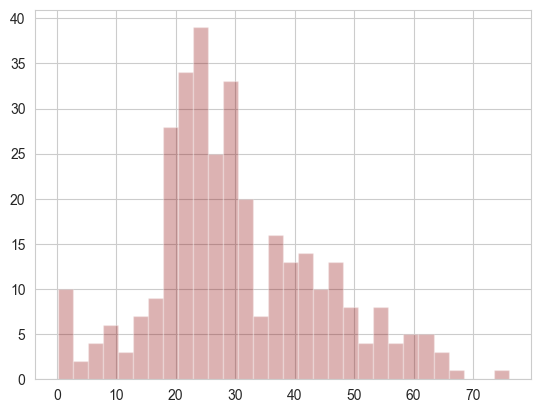

In [73]:
train['Age'].hist(bins=30, color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

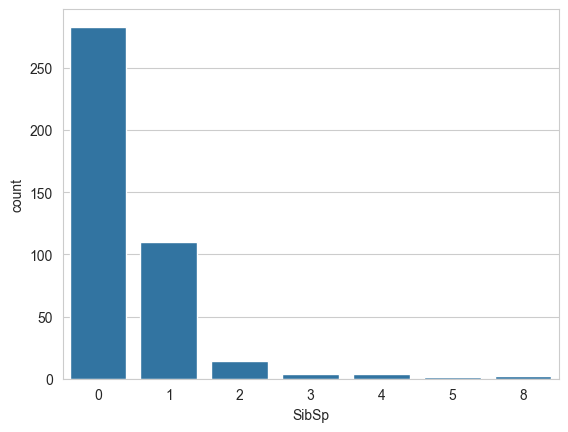

In [74]:
sns.countplot(x='SibSp',data=train)

<Axes: >

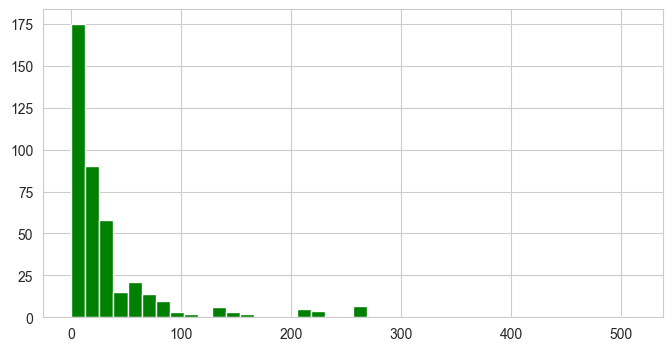

In [75]:
train['Fare'].hist(color='green',bins=40 ,figsize=(8,4))

# removing null values and nan values /data cleaning

C:\Users\dell\AppData\Local\Temp\ipykernel_4716\4135693399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

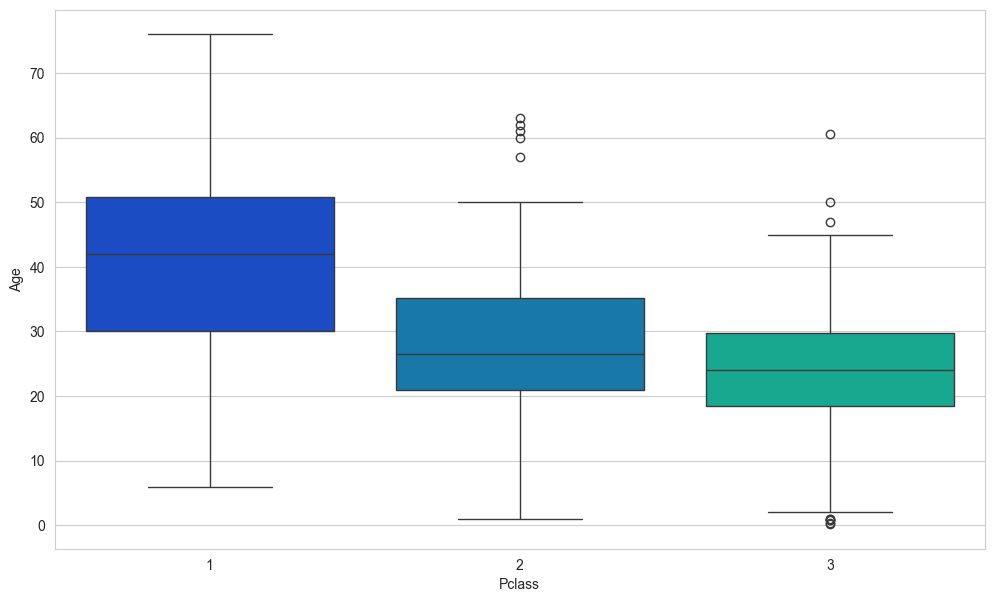

In [76]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

now writing function of replacing

In [77]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [78]:
train['Age']=train[['Age','Pclass']].apply(input_age, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_4716\1699345603.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_4716\1699345603.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

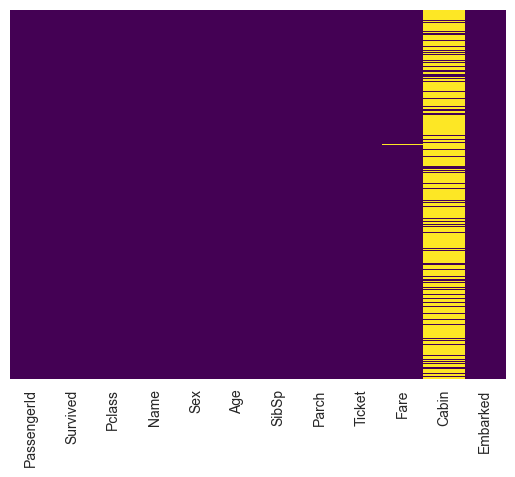

In [79]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Users\dell\AppData\Local\Temp\ipykernel_4716\849093465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Fare'>

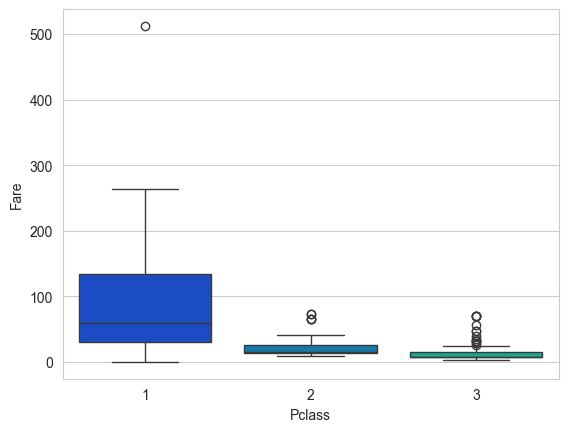

In [80]:
# plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')

In [81]:
def input_fare(cols):
    Fare=cols[0]
    Pclass=cols[1]
    if pd.isnull(Fare):
        if Pclass==1:
            return 70
        elif Pclass==2:
            return 10
        else:
            return 5
    return Fare

In [82]:
train['Fare']=train[['Fare','Pclass']].apply(input_fare, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_4716\2396858405.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Fare=cols[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_4716\2396858405.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

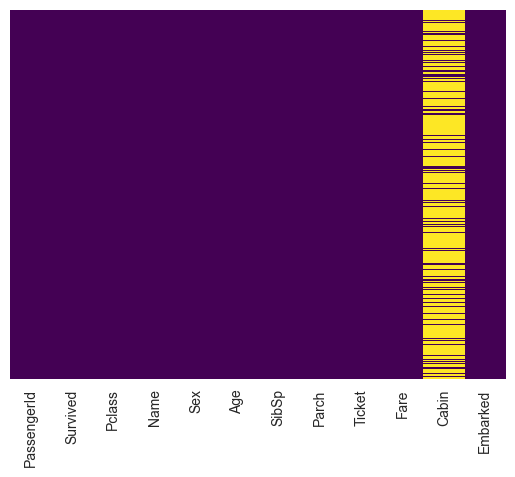

In [83]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

now we can do for cabin

In [84]:
train.dropna(inplace=True)

<Axes: >

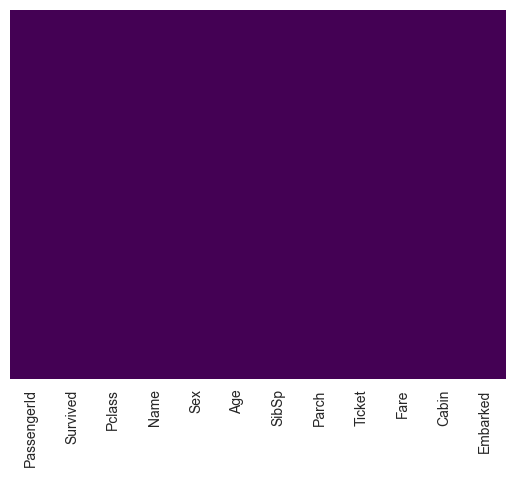

In [85]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


## Converting the categorical features

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 12 to 414
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Survived     91 non-null     int64  
 2   Pclass       91 non-null     int64  
 3   Name         91 non-null     object 
 4   Sex          91 non-null     object 
 5   Age          91 non-null     float64
 6   SibSp        91 non-null     int64  
 7   Parch        91 non-null     int64  
 8   Ticket       91 non-null     object 
 9   Fare         91 non-null     float64
 10  Cabin        91 non-null     object 
 11  Embarked     91 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ KB


In [88]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
12,False,True
14,False,True
24,False,False
26,False,False
28,False,True


In [89]:
sex =pd.get_dummies(train['Sex'],drop_first=True)
embarked =pd.get_dummies(train['Embarked'],drop_first=True)

In [90]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [91]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
12,904,1,1,23.0,1,0,82.2667
14,906,1,1,47.0,1,0,61.1750
24,916,1,1,48.0,1,3,262.3750
26,918,1,1,22.0,0,1,61.9792
28,920,0,1,41.0,0,0,30.5000


In [93]:
train =pd.concat([train,sex,embarked],axis=1)

In [94]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
12,904,1,1,23.0,1,0,82.2667,False,False,True
14,906,1,1,47.0,1,0,61.1750,False,False,True
24,916,1,1,48.0,1,3,262.3750,False,False,False
26,918,1,1,22.0,0,1,61.9792,False,False,False
28,920,0,1,41.0,0,0,30.5000,True,False,True


## Building Logistic Regression Model

# train test split

In [95]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
12,904,1,23.0,1,0,82.2667,False,False,True
14,906,1,47.0,1,0,61.1750,False,False,True
24,916,1,48.0,1,3,262.3750,False,False,False
26,918,1,22.0,0,1,61.9792,False,False,False
28,920,1,41.0,0,0,30.5000,True,False,True


In [96]:
train['Survived'].head()

12    1
14    1
24    1
26    1
28    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
X_train, X_test, y_train , y_test=train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'],test_size=0.30,
                                                   random_state=101)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()
logmodel=fit(X_train,y_train)

In [ ]:
predictions =logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test,predictions)

In [ ]:
accuracy

In [ ]:

accuracy =accuracy_score(y_test,predictions)

In [ ]:
predictions